In [8]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

# Premier réseau de neuronnes : reconnaissances d'un chiffre écrit à la main :

# Les deux jeux de données sont des jeu de données connues et utilisé pour apprendre les NN, on les téléchargent directement grâce au download=True, 
#  On les téléchargent dans le répertoire du premier paramètre de MNIST ici : ''

# Jeu de données pour l'apprentissage
train = datasets.MNIST('', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))
# Jeu de données pour les tests
test = datasets.MNIST('', train=False, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor()
                       ]))

# On mélange les données et batch_size c'est combien de données à la fois on passe mais comme on va traiter des images de 28*28, nos CPU pouuraient tous traiter d'un coup
trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=False)



print("Done")

Done


In [9]:
# La classe qui représente le réseau de neuronnes, elle hérites de nn.Module
class Net(nn.Module):

# On utilise init de nn.Module avec super()
    def __init__(self):
        super().__init__()
        input = 28*28
        output = output2 = output3 = 64
        lastOutput = 10         # On veut reconnaître des chiffres donc la dernière sortie sera entre [0,9] donc de tailles 10

        # On créer nos couches de neuronnes
        self.fc1 = nn.Linear(input, output)         # Nb input = le nombre de valeur à prendre en compte pour la décision 
                                                    # Nb output le nombre de choix possible pour une décision
        self.fc2 = nn.Linear(output, output2)       # 1Deuxième couche de neuronnes
        self.fc3 = nn.Linear(output2, output3)      # Troisième : Possibilité que output=output2=output3
        self.fc4 = nn.Linear(output3, lastOutput)


# Pour chaque données on l'a fait passer à travers notre réseau de neuronnes
    def forward(self, x):
        x = F.relu(self.fc1(x))         # F.relu transforme notre x (qui peut être = 15605 par ex) dans un intervalle [0,1]
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)                 # Pour notre dernière couche qui sera une matrice de taille [1, nb de coup jouable] 

        return F.log_softmax(x, dim=1)  #On aura une matrice de taille 1,10 pour la reconnaissance des chiffres avec une probabilité que ce soit chacun des chiffres

# Ici c'est mon main hihi
net = Net()
# print(net)

# x = torch.rand((1,10))
# print(x)
# x = x.view(1,10)
# output=net(x)
# print(output)


print("Done")

Done


In [10]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)      # lr = learning rate : permet de dire à l'optimizer de ne pas sur apprendre sur chaque données
                                                        # On ne va pas que lorsqu'il se trompe dans sa prédiction, il se corrige pour avoir une probabilité de 0 partout et de 1 sur le bon chiffre
                                                        # Sinon on va sur-apprendre et ce n'est pas bon
print("Done")

Done


In [11]:
                                                        # On va donc optimiser la perte "Loss" sans la rendre nulle pour éviter le sur-apprentissage
EPOCHS = 3
for epoch in range(EPOCHS): # 3 full passes over the data
    for data in trainset:  # `data` is a batch of data
         X, y = data  # X sont les données d'une image 28*28, y est le label càd le chiffre que représente l'image
         net.zero_grad()    # On reset pour chaque data
         output = net(X.view(-1,28*28))  # On fait passer notre data dans le NN (-1 pour faire ligne --> colonne)
         loss = F.nll_loss(output, y)   # On calcul la perte avec l'output qu'on a eu et y le résultat voulu
         loss.backward()                # Calcul tous seul le gradient (merci Pytorch)     
         optimizer.step()               # Lance une étape d'optimisatin
    print(loss)


print("Done")

tensor(0.0440, grad_fn=<NllLossBackward>)
tensor(0.0009, grad_fn=<NllLossBackward>)
tensor(0.0102, grad_fn=<NllLossBackward>)
Done


In [13]:
# On va voir à quel point on est correcte : 
correct = 0
total = 0

with torch.no_grad():       # On ne veut pas des gradient ici on va juste regarder si on a bon ou pas sur la valeur avec le plus de proba
    for data in testset:
        X, y = data
        output = net(X.view(-1,784))
        #print(output)
        for idx, i in enumerate(output):
            #print(torch.argmax(i), y[idx])
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

print("Accuracy: ", round(correct/total, 3))    # On arrondi la précision
print("Done")

Accuracy:  0.969
Done


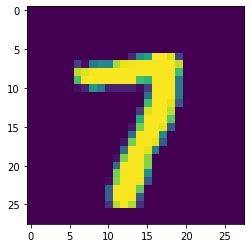

tensor(7)


In [16]:
import matplotlib.pyplot as plt

# Afficher la première image
plt.imshow(X[0].view(28,28))
plt.show()

# Afficher notre prédiction (avec la proba la + élévé) de notre modèle
print(torch.argmax(net(X[0].view(-1,784))[0]))
print("Done")